<a href="https://colab.research.google.com/github/PLUXINDUI/Ispm_course/blob/main/%D0%A3%D0%9F%D0%A1%D0%98%D0%A1/%22%D0%A3%D0%9F%D0%98%D0%A1_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%965_%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D0%BB%D0%B5%D0%BD%D0%B4%D0%B0%D1%80%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D0%BB%D0%B0%D0%BD%D0%B0_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B0_%D0%B8_%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B8%D1%81%D0%BA%D0%B0%D0%BC%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №5. Формирование календарного плана проекта и управление рисками**



# **Формирование календарного плана проекта и управление рисками**



## **Тема дипломного проекта: "Разработка настольного приложения для симуляции влияния аэродинамических модификаций кузова автомобиля на его скоростные характеристики"**



### **1. Календарный план проекта (диаграмма Ганта)**



#### **Функция Python для построения диаграммы Ганта:**

In [4]:
def create_gantt_chart(tasks, title="Диаграмма Ганта", save_path="gantt_chart.png", figsize=(16, 8)):
    """
    Создает и сохраняет диаграмму Ганта в виде таблицы на основе предоставленных данных о задачах.

    Параметры:
    ----------
    tasks : list of dict
        Список словарей, каждый из которых содержит информацию о задаче в формате:
        {"Task": "Название задачи", "Start": "YYYY-MM-DD", "End": "YYYY-MM-DD", "Group": "Группа задачи"}
    title : str, optional
        Заголовок диаграммы
    save_path : str, optional
        Путь для сохранения изображения
    figsize : tuple, optional
        Размер изображения (ширина, высота) в дюймах

    Возвращает:
    -----------
    None (сохраняет изображение и отображает его)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime, timedelta

    # Создание DataFrame и преобразование дат
    df = pd.DataFrame(tasks)
    df['Start'] = pd.to_datetime(df['Start'])
    df['End'] = pd.to_datetime(df['End'])

    # Определение временного диапазона проекта
    project_start = df['Start'].min().date()
    project_end = df['End'].max().date()
    project_duration = (project_end - project_start).days + 1

    # Создание всех дат проекта
    all_dates = [project_start + timedelta(days=i) for i in range(project_duration)]
    date_labels = [date.strftime('%d-%m') for date in all_dates]

    # Создание длинного формата данных для heatmap
    gantt_data = []
    for i, task in enumerate(df.itertuples()):
        task_start = task.Start.date()
        task_end = task.End.date()
        for date in all_dates:
            is_active = 1 if task_start <= date <= task_end else 0
            gantt_data.append({
                'Task': task.Task,
                'Date': date.strftime('%Y-%m-%d'),
                'Active': is_active,
                'Group': task.Group
            })

    # Преобразование в DataFrame
    gantt_df = pd.DataFrame(gantt_data)

    # Преобразование в матричный формат для heatmap
    gantt_matrix = gantt_df.pivot(index='Task', columns='Date', values='Active')

    # Получение уникальных групп задач
    groups = df['Group'].unique()

    # Создание цветовой схемы для групп
    group_values = {group: i+1 for i, group in enumerate(groups)}

    # Создание матрицы с группами
    group_matrix = np.zeros_like(gantt_matrix.values)
    for i, task in enumerate(gantt_matrix.index):
        group = df[df['Task'] == task]['Group'].values[0]
        group_value = group_values[group]
        active_indices = np.where(gantt_matrix.iloc[i, :] == 1)
        group_matrix[i, active_indices] = group_value

    # Настройка цветовой схемы - исправлено для устранения deprecation warning
    num_colors = len(group_values) + 1
    cmap = plt.colormaps['Paired']  # Используем plt.colormaps вместо plt.cm.get_cmap
    colors = [cmap(i/(num_colors-1)) for i in range(num_colors)]
    custom_cmap = plt.matplotlib.colors.ListedColormap(['white'] + colors[1:])

    # Создание фигуры с дополнительным пространством для легенды
    fig, ax = plt.subplots(figsize=figsize)

    # Создание heatmap с seaborn
    ax = sns.heatmap(group_matrix, cmap=custom_cmap, cbar=False,
                    linewidths=.5, linecolor='gray',
                    xticklabels=date_labels, yticklabels=gantt_matrix.index, ax=ax)

    # Настройка осей
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Дата', fontsize=12)
    ax.set_ylabel('Задача', fontsize=12)

    # Настройка частоты меток по оси X (каждые 7 дней)
    tick_positions = np.arange(0, project_duration, 7)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([all_dates[pos].strftime('%d-%m-%Y') for pos in tick_positions], rotation=45)

    # Добавление сетки для недель
    for week_pos in tick_positions:
        plt.axvline(x=week_pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

    # Добавление легенды вне области графика
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[group_values[group]],
                                    edgecolor='gray', label=group)
                      for group in group_values.keys()]

    # Размещаем легенду вне области графика (справа от диаграммы)
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),
             fontsize=10, frameon=True, fancybox=True, shadow=True)

    # Оптимизация размещения
    plt.tight_layout()

    # Сохранение с высоким разрешением
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

При выполнении данного кода будет создана диаграмма Ганта, отображающая все задачи проекта с цветовым кодированием по группам задач и указанием дат начала и окончания.


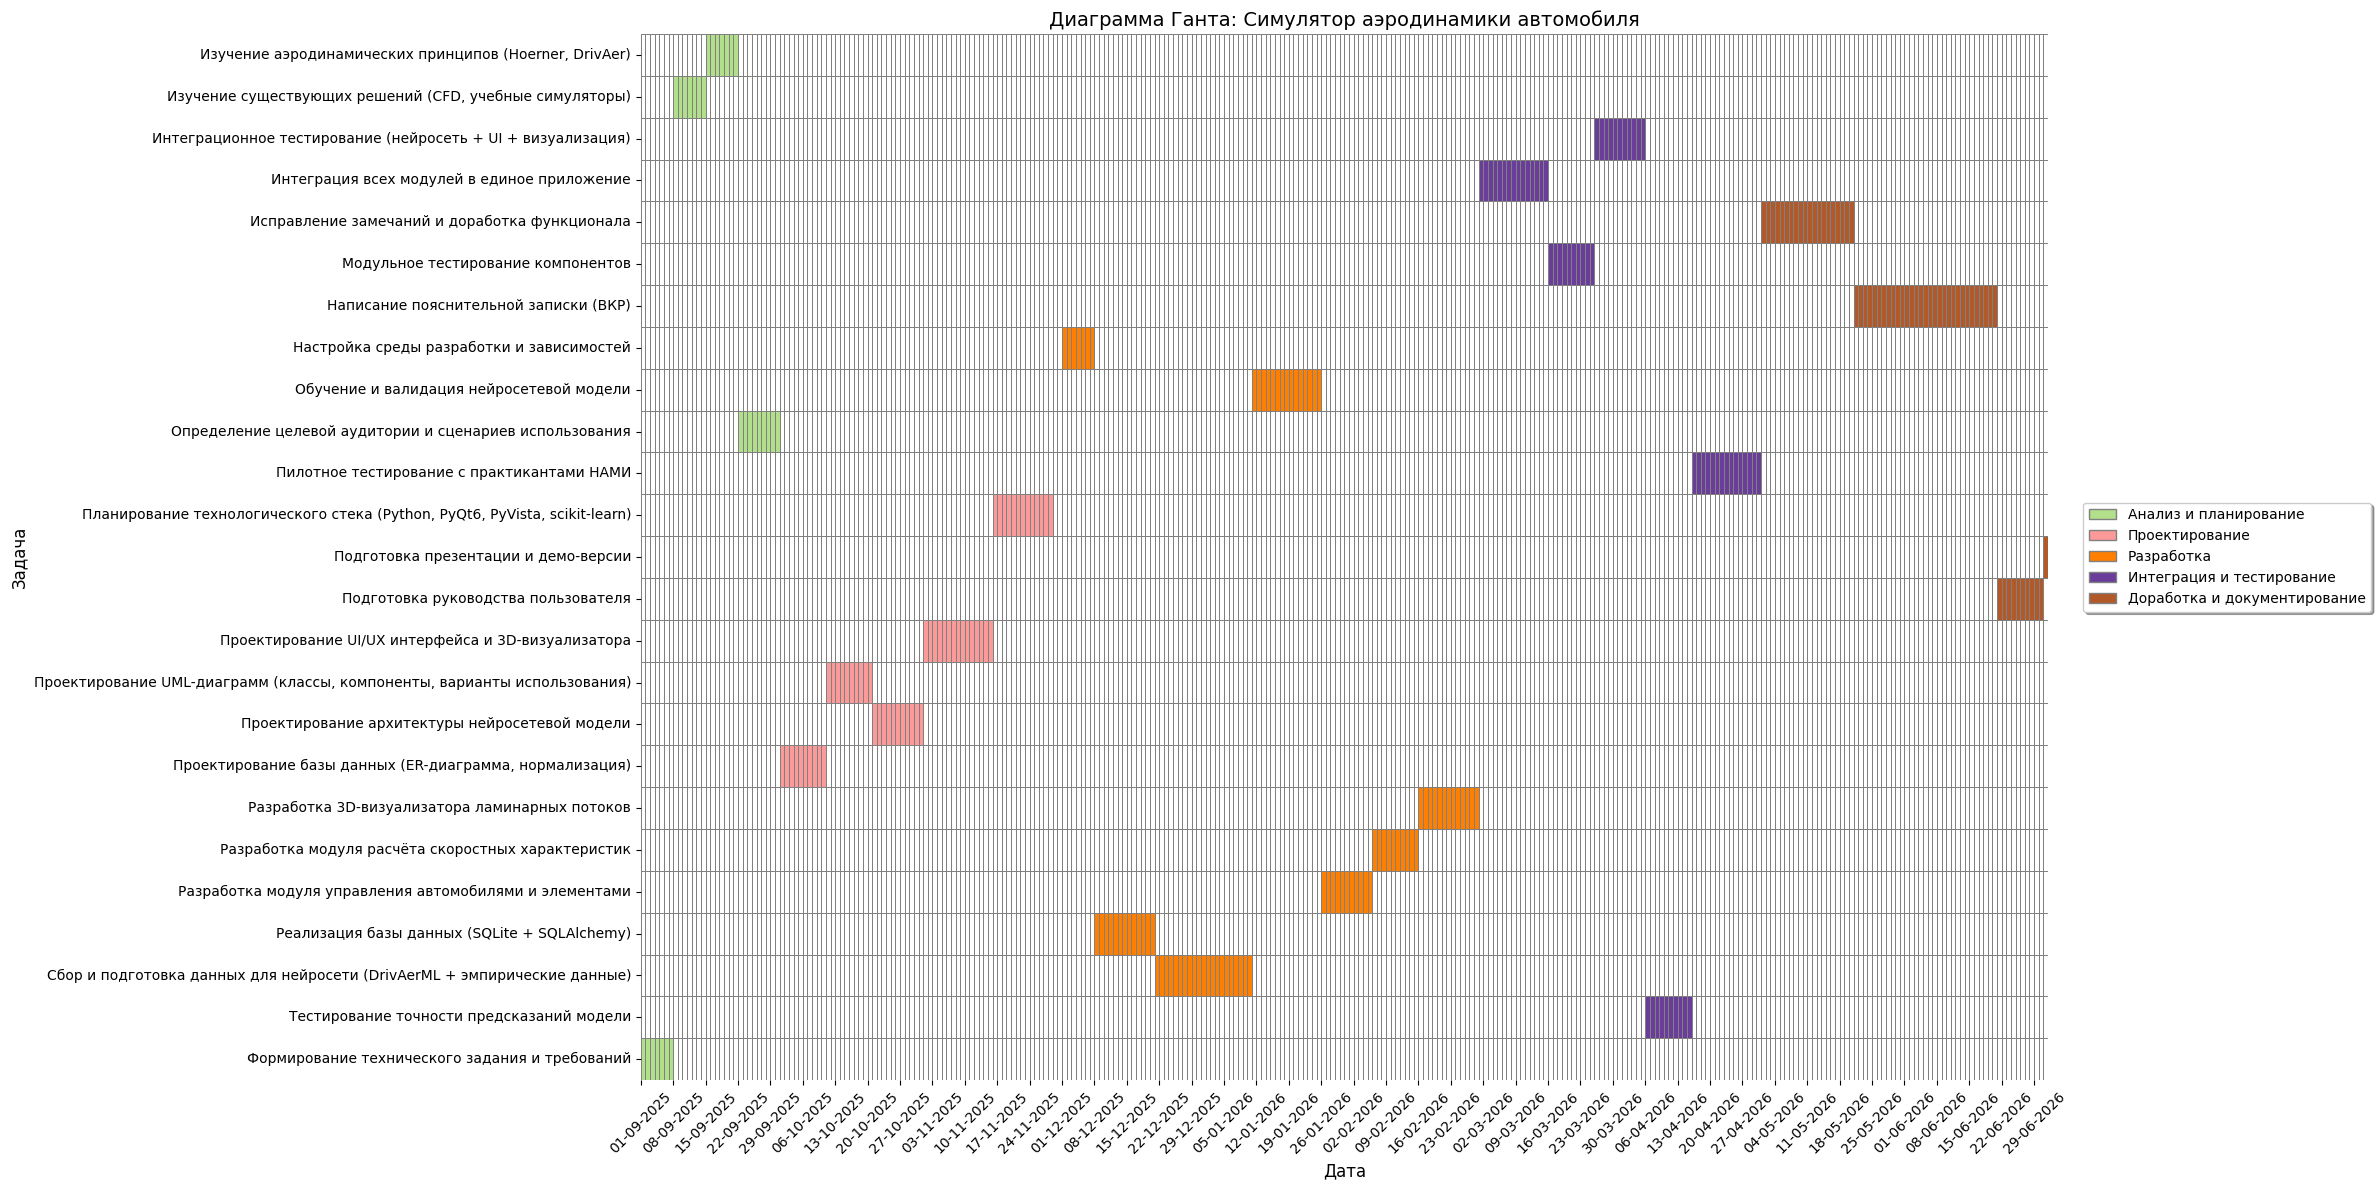

In [5]:
sample_tasks = [
    # === 1. Анализ и планирование (01.09.2025 – 30.09.2025) ===
    {"Task": "Формирование технического задания и требований", "Start": "2025-09-01", "End": "2025-09-07", "Group": "Анализ и планирование"},
    {"Task": "Изучение существующих решений (CFD, учебные симуляторы)", "Start": "2025-09-08", "End": "2025-09-14", "Group": "Анализ и планирование"},
    {"Task": "Изучение аэродинамических принципов (Hoerner, DrivAer)", "Start": "2025-09-15", "End": "2025-09-21", "Group": "Анализ и планирование"},
    {"Task": "Определение целевой аудитории и сценариев использования", "Start": "2025-09-22", "End": "2025-09-30", "Group": "Анализ и планирование"},

    # === 2. Проектирование (01.10.2025 – 28.11.2025) ===
    {"Task": "Проектирование базы данных (ER-диаграмма, нормализация)", "Start": "2025-10-01", "End": "2025-10-10", "Group": "Проектирование"},
    {"Task": "Проектирование UML-диаграмм (классы, компоненты, варианты использования)", "Start": "2025-10-11", "End": "2025-10-20", "Group": "Проектирование"},
    {"Task": "Проектирование архитектуры нейросетевой модели", "Start": "2025-10-21", "End": "2025-10-31", "Group": "Проектирование"},
    {"Task": "Проектирование UI/UX интерфейса и 3D-визуализатора", "Start": "2025-11-01", "End": "2025-11-15", "Group": "Проектирование"},
    {"Task": "Планирование технологического стека (Python, PyQt6, PyVista, scikit-learn)", "Start": "2025-11-16", "End": "2025-11-28", "Group": "Проектирование"},

    # === 3. Разработка (01.12.2025 – 28.02.2026) ===
    {"Task": "Настройка среды разработки и зависимостей", "Start": "2025-12-01", "End": "2025-12-07", "Group": "Разработка"},
    {"Task": "Реализация базы данных (SQLite + SQLAlchemy)", "Start": "2025-12-08", "End": "2025-12-20", "Group": "Разработка"},
    {"Task": "Сбор и подготовка данных для нейросети (DrivAerML + эмпирические данные)", "Start": "2025-12-21", "End": "2026-01-10", "Group": "Разработка"},
    {"Task": "Обучение и валидация нейросетевой модели", "Start": "2026-01-11", "End": "2026-01-25", "Group": "Разработка"},
    {"Task": "Разработка модуля управления автомобилями и элементами", "Start": "2026-01-26", "End": "2026-02-05", "Group": "Разработка"},
    {"Task": "Разработка модуля расчёта скоростных характеристик", "Start": "2026-02-06", "End": "2026-02-15", "Group": "Разработка"},
    {"Task": "Разработка 3D-визуализатора ламинарных потоков", "Start": "2026-02-16", "End": "2026-02-28", "Group": "Разработка"},

    # === 4. Интеграция и тестирование (01.03.2026 – 30.04.2026) ===
    {"Task": "Интеграция всех модулей в единое приложение", "Start": "2026-03-01", "End": "2026-03-15", "Group": "Интеграция и тестирование"},
    {"Task": "Модульное тестирование компонентов", "Start": "2026-03-16", "End": "2026-03-25", "Group": "Интеграция и тестирование"},
    {"Task": "Интеграционное тестирование (нейросеть + UI + визуализация)", "Start": "2026-03-26", "End": "2026-04-05", "Group": "Интеграция и тестирование"},
    {"Task": "Тестирование точности предсказаний модели", "Start": "2026-04-06", "End": "2026-04-15", "Group": "Интеграция и тестирование"},
    {"Task": "Пилотное тестирование с практикантами НАМИ", "Start": "2026-04-16", "End": "2026-04-30", "Group": "Интеграция и тестирование"},

    # === 5. Доработка и документирование (01.05.2026 – 01.07.2026) ===
    {"Task": "Исправление замечаний и доработка функционала", "Start": "2026-05-01", "End": "2026-05-20", "Group": "Доработка и документирование"},
    {"Task": "Написание пояснительной записки (ВКР)", "Start": "2026-05-21", "End": "2026-06-20", "Group": "Доработка и документирование"},
    {"Task": "Подготовка руководства пользователя", "Start": "2026-06-21", "End": "2026-06-30", "Group": "Доработка и документирование"},
    {"Task": "Подготовка презентации и демо-версии", "Start": "2026-07-01", "End": "2026-07-01", "Group": "Доработка и документирование"}
]
# === ЗАПУСК ДИАГРАММЫ ===
create_gantt_chart(
    tasks=sample_tasks,
    title="Диаграмма Ганта: Симулятор аэродинамики автомобиля",
    save_path="gantt_aero_simulator.png",
    figsize=(24, 12)
)

#### **Задачи проекта:**

| Этап / Задача | Длительность | Предшественники | Начало | Окончание |
|---|---|---|---|---|
| **1. Анализ и планирование** | | | | |
| 1.1 Формирование технического задания и требований | 7 дн. | — | 01.09.2025 | 07.09.2025 |
| 1.2 Изучение существующих решений (CFD, симуляторы, учебные ПО) | 7 дн. | — | 08.09.2025 | 14.09.2025 |
| 1.3 Изучение аэродинамических принципов (Hoerner, DrivAer, SAE-публикации) | 7 дн. | — | 15.09.2025 | 21.09.2025 |
| 1.4 Определение целевой аудитории и сценариев использования (практиканты НАМИ) | 10 дн. | 1.1–1.3 | 22.09.2025 | 30.09.2025 |
| **2. Проектирование** | | | | |
| 2.1 Проектирование базы данных (ER-диаграмма, нормализация) | 10 дн. | 1.4 | 01.10.2025 | 10.10.2025 |
| 2.2 Проектирование UML-диаграмм (классы, варианты использования, компоненты) | 10 дн. | 1.4 | 11.10.2025 | 20.10.2025 |
| 2.3 Проектирование архитектуры нейросетевой модели (входы, выходы, источники данных) | 11 дн. | 2.1, 2.2 | 21.10.2025 | 31.10.2025 |
| 2.4 Проектирование UI/UX интерфейса и 3D-визуализатора | 15 дн. | 2.2 | 01.11.2025 | 15.11.2025 |
| 2.5 Планирование технологического стека и архитектуры приложения | 13 дн. | 2.3, 2.4 | 16.11.2025 | 28.11.2025 |
| **3. Разработка** | | | | |
| 3.1 Настройка среды разработки (Python, PyQt6, PyVista, scikit-learn) | 7 дн. | 2.5 | 01.12.2025 | 07.12.2025 |
| 3.2 Реализация базы данных (SQLite + SQLAlchemy) | 13 дн. | 2.1 | 08.12.2025 | 20.12.2025 |
| 3.3 Сбор и предобработка данных (DrivAerML + эмпирические зависимости) | 21 дн. | 2.3 | 21.12.2025 | 10.01.2026 |
| 3.4 Обучение и валидация нейросетевой модели | 15 дн. | 3.3 | 11.01.2026 | 25.01.2026 |
| 3.5 Разработка модуля управления автомобилями и аэродинамическими элементами | 11 дн. | 3.2 | 26.01.2026 | 05.02.2026 |
| 3.6 Разработка модуля расчёта скоростных характеристик | 10 дн. | 3.4, 3.5 | 06.02.2026 | 15.02.2026 |
| 3.7 Разработка 3D-визуализатора ламинарных потоков | 13 дн. | 2.4 | 16.02.2026 | 28.02.2026 |
| **4. Интеграция и тестирование** | | | | |
| 4.1 Интеграция всех модулей в единое приложение | 15 дн. | 3.6, 3.7 | 01.03.2026 | 15.03.2026 |
| 4.2 Модульное тестирование компонентов | 10 дн. | 4.1 | 16.03.2026 | 25.03.2026 |
| 4.3 Интеграционное тестирование (нейросеть + UI + визуализация) | 11 дн. | 4.2 | 26.03.2026 | 05.04.2026 |
| 4.4 Тестирование точности предсказаний модели (на тестовой выборке) | 10 дн. | 4.3 | 06.04.2026 | 15.04.2026 |
| 4.5 Пилотное тестирование с практикантами НАМИ | 15 дн. | 4.4 | 16.04.2026 | 30.04.2026 |
| **5. Доработка и документирование** | | | | |
| 5.1 Анализ замечаний и доработка функционала | 20 дн. | 4.5 | 01.05.2026 | 20.05.2026 |
| 5.2 Написание пояснительной записки (ВКР) | 31 дн. | 5.1 | 21.05.2026 | 20.06.2026 |
| 5.3 Подготовка руководства пользователя | 10 дн. | 5.1 | 21.05.2026 | 30.05.2026 |
| 5.4 Подготовка презентации и демо-версии | 2 дн. | 5.2, 5.3 | 29.06.2026 | 30.06.2026 |
| 5.5 Финальная сборка и сдача проекта | 1 дн. | 5.4 | 01.07.2026 | 01.07.2026 |

**Критический путь*:** 1.1 → 1.3 → 1.4 → 2.1 → 2.3 → 2.4 → 3.2 → 3.3 → 3.6 → 3.7 → 4.1 → 4.2 → 4.3 → 4.4 → 5.1/5.2 → 5.3

### **2. Анализ и управление рисками проекта**



#### **Таблица анализа рисков:**

| ID | Риск | Вероятность | Влияние | Рейтинг | Стратегия реагирования | Превентивные меры |
|----|------|-------------|---------|---------|------------------------|-------------------|
| R1 | Недостаточная точность нейросетевой модели для оценки C x C x​/ C L C L​ | Высокая | Высокое | Критический | Снижение | • Использование DrivAerML как основы<br>• Валидация на известных конфигурациях<br>• Резервный режим на основе эмпирических формул |
| R2 | Отсутствие 3D-моделей для учебных автомобилей | Средняя | Среднее | Средний | Снижение | • Использование упрощённых геометрий (box + wheels)<br>• Генерация примитивов в PyVista<br>• Обращение к открытой библиотеке DrivAer (STL-файлы) |
| R3 | Сложности с отображением 3D-визуализации в PyQt6 | Средняя | Высокое | Высокий | Снижение | • Раннее тестирование PyVista + PyQt6<br>• Поддержка «лёгкого» режима (2D-схемы при проблемах)<br>• Документация по совместимости драйверов |
| R4 | Недостаточная вовлечённость практикантов НАМИ в тестирование | Низкая | Среднее | Средний | Принятие + Избежание | • Согласование с руководством НАМИ заранее<br>• Подготовка альтернативного теста с коллегами<br>• Сбор анонимной обратной связи через форму |
| R5 | Проблемы с упаковкой приложения в .exe (PyInstaller) | Средняя | Среднее | Средний | Снижение | • Раннее тестирование упаковки на чистой системе<br>• Использование виртуального окружения<br>• Поддержка запуска из исходников как резерв |


### **3. Контрольные точки проекта**


### **Новые контрольные точки проекта**

|№|Веха|Плановая дата|Критерии достижения|
|---|---|---|---|
|1|Утверждение технического задания и завершение аналитического этапа|30.09.2025|• Техническое задание согласовано с научным руководителем и НАМИ<br>• Определены все функциональные и нефункциональные требования<br>• Сформулированы сценарии использования для студентов-практикантов|
|2|Завершение проектирования системы|28.11.2025|• Готовы и утверждены все UML-диаграммы (варианты использования, классы, компоненты)<br>• Утверждена ER-диаграмма базы данных<br>• Определена архитектура нейросетевой модели и 3D-визуализатора<br>• Утверждён технологический стек (Python, PyQt6, PyVista, scikit-learn)|
|3|Завершение основной разработки и интеграция модулей|28.02.2026|• Реализованы все ключевые модули: управление авто, элементы, расчёт характеристик, визуализация<br>• Нейросетевая модель интегрирована и работает в связке с UI<br>• Приложение запускается локально без критических ошибок<br>• Есть возможность добавлять/удалять элементы и видеть изменения в реальном времени|
|4|Завершение тестирования и апробация с целевой аудиторией|30.04.2026|• Проведено модульное и интеграционное тестирование<br>• Точность предсказаний модели подтверждена: MAE(C₅) ≤ 0.005 на тестовой выборке DrivAerML<br>• Получена письменная обратная связь от минимум 5 практикантов НАМИ<br>• Все критические замечания устранены|
|5|Готовность к защите дипломного проекта|01.07.2026|• Написана и сдана пояснительная записка (ВКР)<br>• Подготовлено руководство пользователя в формате PDF<br>• Сформирована демо-версия приложения (.exe) с инструкцией по запуску<br>• Готова презентация (10–15 слайдов) и сценарий защиты|

### **4. Пояснительная записка**



#### **Обоснование принятых решений**

Обоснование структуры календарного плана

Календарный план выстроен по итеративно-последовательной модели с акцентом на раннее создание работающего прототипа. Проект разделён на пять логических этапов, соответствующих стандартной жизненной циклу ПО, но адаптированных под специфику прикладного ML-проекта в инженерной сфере.

Особое внимание уделено:

Сбору данных и обучению модели (задачи 3.2–3.3) — как узкому месту ML-проектов,
Интеграции визуализации и расчётов — ключевому требованию заказчика (НАМИ),
Апробации с практикантами — для подтверждения практической ценности.
Методология анализа рисков
Риски идентифицированы методом мозгового штурма с фокусом на специфику проекта:

ML-компонент (точность, данные),
3D-визуализация (производительность, совместимость),
Учебный контекст (вовлечённость студентов).
Использована матрица вероятность/влияние по стандарту PMBOK. Приоритет — на критические риски, способные сделать приложение неработоспособным или неточным.

Принципы определения контрольных точек

Вехи выбраны так, чтобы:

Соответствовать завершению ключевых этапов,
Служить точками проверки качества перед переходом к следующему этапу,
Быть измеримыми (например, MAE ≤ 0.005, а не «модель хорошая»).
Все вехи привязаны к реальным артефактам: ТЗ, диаграммы, модель, .exe-файл, ВКР.

Взаимосвязь компонентов

Диаграмма Ганта отражает последовательность задач, вытекающих из UML-архитектуры.
Риски напрямую связаны с сложными задачами (например, R1 ↔ задача 3.3).
Контрольные точки — это итоги этапов из календарного плана.
Вся система согласована с целями проекта: создание учебного симулятора для НАМИ, работающего локально, на реальных данных, с наглядной визуализацией.